In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/dataset_run_code/tabular_lstm_v4.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  7197 non-null   int64  
 1   Unnamed: 0    7197 non-null   int64  
 2   mssv          7197 non-null   object 
 3   hedt_CLC      7197 non-null   int64  
 4   hedt_CNTN     7197 non-null   int64  
 5   hedt_CQUI     7197 non-null   int64  
 6   hedt_CTTT     7197 non-null   int64  
 7   hedt_KSTN     7197 non-null   int64  
 8   khoa_CNPM     7197 non-null   int64  
 9   khoa_HTTT     7197 non-null   int64  
 10  khoa_KHMT     7197 non-null   int64  
 11  khoa_KTMT     7197 non-null   int64  
 12  khoa_KTTT     7197 non-null   int64  
 13  khoa_MMT&TT   7197 non-null   int64  
 14  diem_tt       7197 non-null   float64
 15  dien_tt_THPT  7197 non-null   int64  
 16  dien_tt_ĐGNL  7197 non-null   int64  
 17  dtt_khac      7197 non-null   int64  
 18  sem1          7197 non-null 

In [ ]:
df.drop(columns = ['Unnamed: 0.1','Unnamed: 0'],inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          7197 non-null   object 
 1   hedt_CLC      7197 non-null   int64  
 2   hedt_CNTN     7197 non-null   int64  
 3   hedt_CQUI     7197 non-null   int64  
 4   hedt_CTTT     7197 non-null   int64  
 5   hedt_KSTN     7197 non-null   int64  
 6   khoa_CNPM     7197 non-null   int64  
 7   khoa_HTTT     7197 non-null   int64  
 8   khoa_KHMT     7197 non-null   int64  
 9   khoa_KTMT     7197 non-null   int64  
 10  khoa_KTTT     7197 non-null   int64  
 11  khoa_MMT&TT   7197 non-null   int64  
 12  diem_tt       7197 non-null   float64
 13  dien_tt_THPT  7197 non-null   int64  
 14  dien_tt_ĐGNL  7197 non-null   int64  
 15  dtt_khac      7197 non-null   int64  
 16  sem1          7197 non-null   float64
 17  sem2          7197 non-null   float64
 18  sem3          7197 non-null 

In [ ]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 42.4 MB/s eta 0:00:00


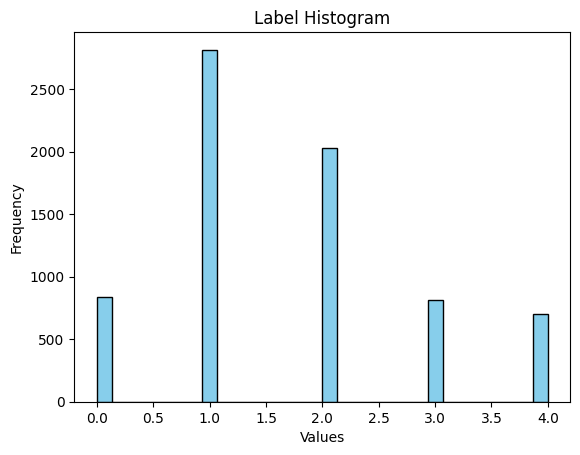

In [ ]:
# Plotting a basic histogram
plt.hist(df['label'], bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Label Histogram')

# Display the plot
plt.show()

In [ ]:
features = df.drop('label', axis=1)
labels = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `X` is your dataset features and `y` is your labels
# Replace `X` and `y` with your actual data

# Step 1: Split into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    features, labels, test_size=0.2, stratify=labels, random_state=42
)

# Step 2: Split temp into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Final ratio: 80% train, 10% validation, 10% test


In [ ]:
import numpy as np

def print_distribution(labels, dataset_name):
    unique, counts = np.unique(labels, return_counts=True)
    print(f"{dataset_name} Distribution: {dict(zip(unique, counts))}")

print_distribution(y_train, "Training Set")
print_distribution(y_val, "Validation Set")
print_distribution(y_test, "Test Set")


Training Set Distribution: {0: 673, 1: 2251, 2: 1621, 3: 652, 4: 560}
Validation Set Distribution: {0: 84, 1: 281, 2: 203, 3: 82, 4: 70}
Test Set Distribution: {0: 84, 1: 282, 2: 203, 3: 81, 4: 70}


In [ ]:
# Step 1: Concatenate features and labels for each dataset
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=["label"])], axis=1)
val_data = pd.concat([pd.DataFrame(X_val), pd.DataFrame(y_val, columns=["label"])], axis=1)
test_data = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=["label"])], axis=1)

# Step 2: Export to CSV files
train_data.to_csv("/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/dataset_run_code/train_data.csv", index=False)
val_data.to_csv("/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/dataset_run_code/val_data.csv", index=False)
test_data.to_csv("/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/dataset_run_code/test_data.csv", index=False)

print("Data exported to CSV successfully!")

Data exported to CSV successfully!


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/dataset_run_code/train_data.csv')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics.classification import MulticlassF1Score, MulticlassPrecision, MulticlassRecall, MulticlassAccuracy
import pytorch_lightning as pl
import matplotlib.pyplot as plt


class TabularTimeSeriesModel(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_layers, output_size, lr=1e-3, model_type='mlp'):
        super(TabularTimeSeriesModel, self).__init__()
        self.save_hyperparameters()

        # Model selection logic
        if model_type == 'lstm':
            self.model = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_size, output_size)
        elif model_type == 'bilstm':
            self.model = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
            self.fc = nn.Linear(hidden_size * 2, output_size)
        elif model_type == 'mlp_lstm':  # MLP-LSTM directly embedded here
            self.fc1 = nn.Linear(15, 32)
            self.fc2 = nn.Linear(32, 64)
            self.fc3 = nn.Linear(64, 32)
            self.fc5 = nn.Linear(32, output_size)
            self.norm1 = nn.LayerNorm(32)
            self.norm2 = nn.LayerNorm(64)
            self.norm3 = nn.LayerNorm(32)

            self.lstm1 = nn.LSTM(6, 32, batch_first=True)
            self.lstm2 = nn.LSTM(32, 64, batch_first=True)
            self.lstm3 = nn.LSTM(64, 32, batch_first=True)
        elif model_type == 'mlp':
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.hidden_layers = nn.ModuleList(
                [nn.Linear(hidden_size, hidden_size) for _ in range(8)]  # 3 hidden layers
            )
            self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for _ in range(3)])
            self.dropout = nn.Dropout(p=0.5)
            self.fc2 = nn.Linear(hidden_size, output_size)
        elif model_type == 'mlp_bilstm':
            # MLP + BiLSTM model definition
            self.fc1 = nn.Linear(15, 32)
            self.fc2 = nn.Linear(32, 64)
            self.fc3 = nn.Linear(64, 32)
            self.fc5 = nn.Linear(32, 5)
            self.norm1 = nn.LayerNorm(32)
            self.norm2 = nn.LayerNorm(64)
            self.norm3 = nn.LayerNorm(32)

            # BiLSTM layers
            self.lstm1 = nn.LSTM(6, 16, batch_first=True, bidirectional=True)
            self.lstm2 = nn.LSTM(32, 32, batch_first=True, bidirectional=True)
            self.lstm3 = nn.LSTM(64, 16, batch_first=True, bidirectional=True)
        else:
            raise ValueError(f"Unsupported model type: {model_type}")

        # Loss function
        self.loss_fn = nn.CrossEntropyLoss()

        # Metrics
        self.train_acc = MulticlassAccuracy(num_classes=output_size)
        self.val_f1 = MulticlassF1Score(num_classes=output_size,average='weighted')
        self.val_precision = MulticlassPrecision(num_classes=output_size,average='weighted')
        self.val_recall = MulticlassRecall(num_classes=output_size,average='weighted')
        self.test_acc = MulticlassAccuracy(num_classes=output_size)
        self.test_f1 = MulticlassF1Score(num_classes=output_size,average='weighted')
        self.test_precision = MulticlassPrecision(num_classes=output_size,average='weighted')
        self.test_recall = MulticlassRecall(num_classes=output_size,average='weighted')

        # Loss tracking for visualization
        self.training_losses = []
        self.validation_losses = []

    def forward(self, x):
        if self.hparams.model_type in ['lstm', 'bilstm']:
            if x.ndim == 2:
                x = x.unsqueeze(1)  # Add sequence dimension for LSTM/BiLSTM
            out, _ = self.model(x)
            out = self.fc(out[:, -1, :])  # Use the last hidden state
        elif self.hparams.model_type == 'mlp':
            x = torch.relu(self.fc1(x))
            for hidden_layer, batch_norm in zip(self.hidden_layers, self.batch_norms):
                x = hidden_layer(x)
                x = batch_norm(x)
                x = torch.relu(x)
                x = self.dropout(x)
            out = self.fc2(x)
        elif self.hparams.model_type == 'mlp_lstm':
            # Split the input for MLP and LSTM components
            x_MLP = x[:, :15]  # First 15 columns for MLP
            x_LSTM = x[:, 15:21].unsqueeze(1)  # Columns 16 to 33 for LSTM with sequence dim

            # LSTM layers
            x_LSTM1, _ = self.lstm1(x_LSTM)
            x_LSTM2, _ = self.lstm2(x_LSTM1)
            x_LSTM3, _ = self.lstm3(x_LSTM2)

            # MLP layers
            x_MLP = F.relu(self.norm1(self.fc1(x_MLP)))
            x_MLP = x_MLP + x_LSTM1.squeeze(1)  # Align dimensions after LSTM
            x_MLP = F.relu(self.norm2(self.fc2(x_MLP)))
            x_MLP = x_MLP + x_LSTM2.squeeze(1)  # Align dimensions after LSTM
            x_MLP = F.relu(self.norm3(self.fc3(x_MLP)))
            x_MLP = x_MLP + x_LSTM3.squeeze(1)  # Align dimensions after LSTM
            out = self.fc5(x_MLP)
            out = F.log_softmax(out, dim=1)  # Multi-class classification
        elif self.hparams.model_type == 'mlp_bilstm':
            # Split the input for MLP and BiLSTM components
            x_MLP = x[:, :15]  # First 15 columns for MLP
            x_LSTM = x[:, 15:21].unsqueeze(1)  # Columns 16 to 33 for BiLSTM (ensure sequence dimension)

            # BiLSTM layers
            x_LSTM1, _ = self.lstm1(x_LSTM)
            x_LSTM2, _ = self.lstm2(x_LSTM1)
            x_LSTM3, _ = self.lstm3(x_LSTM2)

            # MLP layers (feature extraction)
            x_MLP = F.relu(self.norm1(self.fc1(x_MLP)))
            x_MLP = x_MLP + x_LSTM1.squeeze(1)  # Combine MLP and BiLSTM output
            x_MLP = F.relu(self.norm2(self.fc2(x_MLP)))
            x_MLP = x_MLP + x_LSTM2.squeeze(1)  # Combine MLP and BiLSTM output
            x_MLP = F.relu(self.norm3(self.fc3(x_MLP)))
            x_MLP = x_MLP + x_LSTM3.squeeze(1)  # Combine MLP and BiLSTM output

            # Final output layer
            out = self.fc5(x_MLP)
            out = F.log_softmax(out, dim=1)  # Multi-class classification
        else:
            raise ValueError(f"Unsupported model type: {self.hparams.model_type}")
        return out

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        acc = self.train_acc(y_hat, y)
        self.log("train_loss", loss)
        self.log("train_acc", acc)
        self.training_losses.append(loss.item())
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)

        # Calculate metrics
        f1 = self.val_f1(y_hat, y)
        precision = self.val_precision(y_hat, y)
        recall = self.val_recall(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()

        # Log metrics
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_f1", f1, prog_bar=True)
        self.log("val_precision", precision, prog_bar=True)
        self.log("val_recall", recall, prog_bar=True)
        self.log("val_acc", acc, prog_bar=True)
        self.validation_losses.append(loss.item())
        return {"val_loss": loss, "val_f1": f1, "val_precision": precision, "val_recall": recall, "val_acc": acc}

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)

        # Calculate metrics
        f1 = self.test_f1(y_hat, y)
        precision = self.test_precision(y_hat, y)
        recall = self.test_recall(y_hat, y)
        acc = self.test_acc(y_hat, y)

        # Log metrics
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_f1", f1, prog_bar=True)
        self.log("test_precision", precision, prog_bar=True)
        self.log("test_recall", recall, prog_bar=True)
        self.log("test_acc", acc, prog_bar=True)
        return {"test_loss": loss, "test_f1": f1, "test_precision": precision, "test_recall": recall, "test_acc": acc}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

    def visualize_training(self):
        # Ensure we plot only up to the actual number of epochs
        epochs = range(1, len(self.training_losses) + 1)  # Create a range for the x-axis
        # Visualize Training and Validation Losses
        plt.figure(figsize=(10, 6))
        plt.plot(self.training_losses, label="Training Loss")
        plt.plot(self.validation_losses, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss Over Epochs")
        plt.legend()
        plt.grid(True)
        plt.show()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name           | Type                | Params | Mode 
----------------------------------------------------------------
0  | fc1            | Linear              | 512    | train
1  | fc2            | Linear              | 2.1 K  | train
2  | fc3            | Linear              | 2.1 K  | train
3  | fc5            | Linear              | 165    | train
4  | norm1          | LayerNorm           | 64     | train
5  | norm2          | LayerNorm           | 128    | train
6  | norm3          | LayerNorm           | 64     | train
7  | lstm1          | LSTM                | 3.1 K  | train
8  | lstm2          | LSTM                | 16.9 K | train
9  | lstm3          | LSTM                | 10.5 K | trai

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 360: 'val_acc' reached 0.60139 (best 0.60139), saving model to '/content/lightning_logs/version_15/checkpoints/best-model-epoch=00-val_acc=0.60.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 720: 'val_acc' reached 0.68333 (best 0.68333), saving model to '/content/lightning_logs/version_15/checkpoints/best-model-epoch=01-val_acc=0.68.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 1080: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 1440: 'val_acc' reached 0.72361 (best 0.72361), saving model to '/content/lightning_logs/version_15/checkpoints/best-model-epoch=03-val_acc=0.72.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 1800: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 2160: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 2520: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 2880: 'val_acc' reached 0.73333 (best 0.73333), saving model to '/content/lightning_logs/version_15/checkpoints/best-model-epoch=07-val_acc=0.73.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 3240: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 3600: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 3960: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 4320: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 4680: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 5040: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 5400: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 5760: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 6120: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 6480: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 6840: 'val_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 7200: 'val_acc' was not in top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.6254863142967224     │
│          test_f1          │    0.6891480088233948     │
│         test_loss         │    0.7026954293251038     │
│      test_precision       │    0.7344627976417542     │
│        test_recall        │    0.6944444179534912     │
└───────────────────────────┴───────────────────────────┘

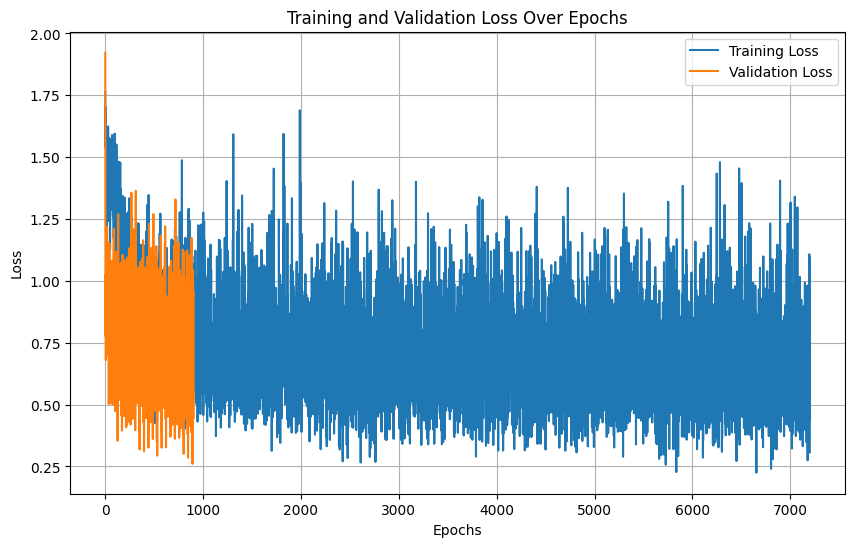

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

# Main training function
def train_lstm_model():
    dataset_train = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/dataset_run_code/train_data.csv')
    dataset_test = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/dataset_run_code/test_data.csv')
    dataset_val = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/dataset_run_code/val_data.csv')

    #prepare data for trainning
    X_train = dataset_train.drop(columns=['mssv','label'])
    X_train = X_train.iloc[:, :21].values  # Select the first 21 columns after dropping
    Y_train = dataset_train['label'].values

    #prepare data for testing
    x_test = dataset_test.drop(columns=['mssv','label'])
    x_test = x_test.iloc[:, :21].values  # Select the first 21 columns after dropping
    y_test = dataset_test['label'].values

    #prepare data for testing
    x_val = dataset_val.drop(columns=['mssv','label'])
    x_val = x_val.iloc[:, :21].values  # Select the first 21 columns after dropping
    y_val = dataset_val['label'].values

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # Long is required for classification labels
    X_val_tensor = torch.tensor(x_val, dtype=torch.float32)
    Y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    Y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Create TensorDatasets
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

    # DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)
    test_loader = DataLoader(test_dataset, batch_size=16)

    # Define model
    model = TabularTimeSeriesModel(input_size=6, hidden_size=64, num_layers=2, output_size=5,model_type='mlp_bilstm')

    # Checkpoint callback
    checkpoint_callback = ModelCheckpoint(
        monitor="val_acc",  # Monitor validation accuracy
        mode="max",  # Save the model with max validation accuracy
        save_top_k=1,  # Keep only the best model
        filename="best-model-{epoch:02d}-{val_acc:.2f}",
        verbose=True
    )

    # Early stopping
    # early_stopping_callback = EarlyStopping(
    #     monitor="val_loss",
    #     mode="max",
    #     patience=5,
    #     verbose=True
    # )

    # Trainer
    trainer = pl.Trainer(
        max_epochs=20,
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        callbacks=[checkpoint_callback],
        log_every_n_steps=10
    )

    # Train the model
    trainer.fit(model, train_loader, val_loader)

    # Test the model
    trainer.test(model, dataloaders=test_loader)

    model.visualize_training()
# Run the training
if __name__ == "__main__":
    train_lstm_model()